# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 


Enough about the process, let's get to the content. 

![Text](https://wallpapers.com/images/high/cool-rapper-zs7xat10uqylszmy.webp "Great image choice, Jonas")

Today, we will use network science and Wikipedia to learn about the relationships of **[West Coast](https://en.wikipedia.org/wiki/Category:West_Coast_hip_hop_musicians)** and **[East coast](https://en.wikipedia.org/wiki/Category:East_Coast_hip_hop_musicians)** rappers. 

To create the network, we will download the Wikipedia pages for all rappers from each coast. Next, we will create the network of the pages that link to each other. Since wikipedia pages link to each other. So [Snoop Dogg](https://en.wikipedia.org/wiki/Snoop_Dogg) links to [Dr. Dre](https://en.wikipedia.org/wiki/Dr._Dre), for example.

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to understand the text displayed on those pages.

But for today, the tasks are

* Learn about regular expressions
* Learn about Pandas dataframes
* Download and store (for later use) all the rapper-pages from Wikipedia
* Extract all the internal wikipedia-links that connect the rappers on wikipedia
* Generate the network of rappers on wikipedia. 
* Calculate some simple network statistics.

## The Guide to Week 4 (not to be missed)

Today I talk about 

* Results of the user satisfaction questionnaire
* Assignment 1
* Today's exercises

> * ***Video lecture*** Guide to week 4 https://www.dropbox.com/scl/fi/b760tkugfrnm9kca1apnb/GuideToWeek4.mp4?rlkey=r7y6pijkafc9zn5tcz1cmj8dg&dl=0

---

# Prelude: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us, up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links. And for that we need regular expressions.

> _Exercises_: Regular expressions round 1\.
> 
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples.
> * Now, explain in your own words: what are regular expressions?   
> Regular expressions are a way to locate a specific pattern in text. They use a combination of characters and symbols. These are a way to extract information from a text.
> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.
> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).
> 

Finally, we need to figure out how how to match internal wiki links. Wiki links come in two flavors. They're always enclosed in double square brackets, e.g. `[[wiki-link]]` and can either occur like this:

    ... some text [[Aristotle]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/Aristotle`](https://en.wikipedia.org/wiki/Aristotle). 

The second flavor has two parts, so that links can handle spaces and other more fancy forms of references, here's an example:

    ... some text [[John_McCain|John McCain]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/John_McCain`](https://en.wikipedia.org/wiki/Eudemus_of_Rhodes). Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

In [122]:
import re

with open('./data/week4_ex1.txt', 'r') as file:
    text = file.read()
    digits = re.findall(r'\s\d\d\d\d\s', text)
    super = re.findall(r'\bsuper\w*', text)
    wiki = re.findall(r'\[\[[^\]]+\]\]', text)
    print(digits)
    print(super)
    print(wiki)


[' 1234 ', ' 9999 ']
['superpolaroid', 'supertaxidermy', 'superbeer']
['[[drinking vinegar]]', '[[gentrify]]', '[[hashtag]]', '[[Bicycle|Bicycle(two-wheeled type)]]', '[[Pitchfork|Pitchfork Magazine]]']


# Prelude part 2: Pandas DataFrames


Before starting, we will also learn a bit about [pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), a very user-friendly data structure that you can use to manipulate tabular data. Pandas dataframes are implemented within the [pandas package] (https://pandas.pydata.org/).

Pandas dataframes should be intuitive to use. **We suggest you to go through the [10 minutes to Pandas tutorial](https://pandas.pydata.org/pandas-docs/version/0.22/10min.html#min) to learn what you need to solve the next exercise.**

---

# Part A: Download the Wikipedia pages of rappers

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you revisit the [**APIs note book**](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/API_check.ipynb) from that week - it contains lots of useful tips on this specific activity (yes, I had planned this all along!). .

Now, you could first download the names of all the rappers, starting from 

* https://en.wikipedia.org/wiki/Category:West_Coast_hip_hop_musicians
* https://en.wikipedia.org/wiki/Category:East_Coast_hip_hop_musicians

But this might result in so much pain and suffering that I will not make you do that (although you are very much welcome to try!). Instead, you can download all the names, nice and clean, here (it might still include couple of *noisy* links, but should be fine in 95% of records):
 
* **[West coast List](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/WestCoastRappers.csv)**
* **[East coast List](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/EastCoastRappers.csv)**

The files contain the wiki-link of all rappers in the two lists above. 


In [123]:
import csv
import requests

rappers = {}

with open('data/EastCoastRappers.csv', "r") as csvfile:
    reader = csv.reader(csvfile)
    rappers = {row[1] : {'wikitext' : None, 'zone' : 'east'} for row in reader}
    del rappers['WikipediaPageName']

with open('data/WestCoastRappers.csv', "r") as csvfile:
    reader = csv.reader(csvfile)
    rappers_west = {row[1] : {'wikitext' : None, 'zone' : 'west'} for row in reader}
    del rappers_west['WikipediaPageName']
    rappers.update(rappers_west)


In [124]:
for key in rappers:
    try :
        baseurl = "https://en.wikipedia.org/w/api.php?"
        params = {
            "action": "query",
            "prop": "revisions",
            "rvprop": "content",
            "format": "json",
            "titles": key.replace(' ', '_')
        }
        wikitext = requests.get(baseurl, params=params)
        wikijson = wikitext.json()
        rappers[key]['wikitext'] = wikijson
    except UnicodeEncodeError as e:
        print(f'UnicodeEncodeError: {e} in {key}')

In [125]:
import json
with open('./data/rappers.json', 'w') as fp:
    json.dump(rappers, fp)

In [126]:
import json 
with open('data/rappers.json', 'r') as f:
    rappers = json.load(f)

for rapper, value in rappers.items():
    pageid = list(value['wikitext']['query']['pages'].keys())[0]
    wikitext = value['wikitext']['query']['pages'][pageid]['revisions'][0]['*']
    links = re.findall(r'\[\[(.*?)\]\]', wikitext)
    rappers_linked = []
    for link in links:
        if link in rappers.keys():
            rappers_linked.append(link)    
    rappers[rapper]['links'] = set(rappers_linked)

---

# Part B: Building the networks

Now, we're going to build one huge NetworkX directed graph, which includes both West-coast and East-coast rappers. 

The nodes in the network will be all the rappers, and we will place an edge between nodes $A$ and $B$ if the Wikipedia page of node $A$ links to the Wikipedia page of node $B$.

 

> ***Video instructions:*** Getting started with rap music. Link: https://www.dropbox.com/scl/fi/ivd99y7tfeqpzj9lxgh0p/GettingStartedWithRapMusic.mp4?rlkey=6y3ye8iex6ogcy93jzyviqlej&dl=0


> 
> _Exercise_: Build the network of rappers 

> Now we can build the network. Isn't this a little bit cool? What a dataset :)

> The overall strategy for this is the following: 
> Take the pages you have downloaded for each rappers. 
> Each page corresponds to a rapper, which is a node in your network. 
> Find all the hyperlinks in a rapper's page that link to another node of the network (e.g. an other character). 
> There are many ways to do this, but below, I've tried to break it down into natural steps. 
> Keep in mind that the network should include **both** West-coast and East-coast rappers (and that it is possible that some West-coast rappers will have links to East-coast rappers and vice-versa).
> 
> **Note**: When you add a node to the network, also include an `attribute` (i.e. that specifies the universe where the character comes from; either West coast, or East coast)
>
>
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. 
> * For each link you extract, check if the target is a rapper. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.github.io/documentation/development/reference/classes.digraph.html) to store the network. Store also the properties of the nodes (i.e. which coast they represent).
> * When have you finished, you'll notice that some nodes do not have any out- or in- degrees. You may *discard* those from the network.


In [127]:
def calculate_edges(rapper, links):
    edges = []
    for link in links:
        edges.append(tuple((rapper, link)))
    return edges

In [128]:
import networkx as nx 
G = nx.DiGraph()

nodes = []
for rapper, value in rappers.items():
    G.add_node(rapper, zone=value['zone'])
    G.add_edges_from(calculate_edges(rapper, value['links']))

In [129]:
isolated_nodes = [x for x in G if G.in_degree(x) == 0 and G.out_degree(x) == 0]
G.remove_nodes_from(isolated_nodes) 

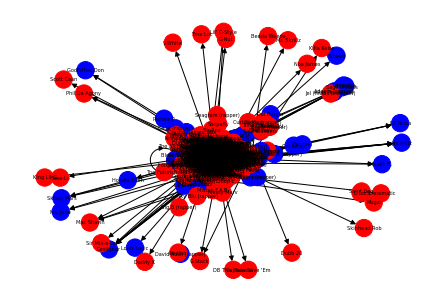

In [130]:
import matplotlib.pyplot as plt

color_map = []
for node in G:
    if rappers[node]['zone'] == 'east':
        color_map.append('blue')
    else:
        color_map.append('red')

plt.figure()
nx.draw(G, with_labels=True, pos=nx.spring_layout(G), font_size=5, node_color=color_map)


> *Exercise*: Simple network statistics and analysis

> * What is the number of nodes in the network? 
> * More importantly, what is the number of links?
> * What is the number of links connecting West coast and East coast? What do those links mean?
> * Plot the in and out-degree distributions. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the degree distribution to a *random network* with the same number of nodes and *p*
>     * Compare the degree distribution to a *scale-free* network with the same number of nodes.
> * Who are top 10 most connected rappers? (Report results for in-degrees and out-degrees). Comment on your findings. Is this what you would have expected?
> * Who are the top 5 most connected West coast rappers (again in terms of both in/out-degree)?
> * Who are the top 5 most connected East coast rappers (again in terms of both in/out-degree)?

> The total degree distribution (in + out degree) for you network should resemble the distribution displayed on the image below:
![img](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/WestcoastvsEastcoast_degrees.png?raw=true)
![img](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/WestcoastvsEastcoast_degrees_loglog.png?raw=true)


In [138]:
print('The network has %i nodes' % len(G.nodes()))
print('The network has %i edges' % len(G.edges()))
east = 0
west = 0
for edge in G.edges():
    if G.nodes[edge[0]]['zone'] == 'east' and G.nodes[edge[0]]['zone'] != G.nodes[edge[1]]['zone']:
        east += 1
    elif G.nodes[edge[0]]['zone'] == 'west' and G.nodes[edge[0]]['zone'] != G.nodes[edge[1]]['zone']:
        west += 1
print(east, west)

The network has 722 nodes
The network has 5008 edges
507 580


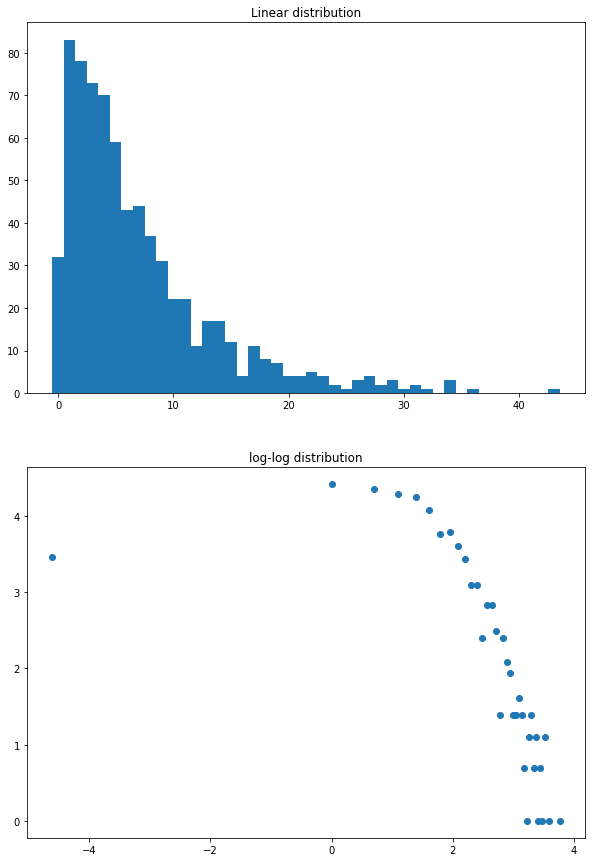

In [145]:
from collections import Counter
from math import log
in_degrees = list(dict(G.out_degree()).values())
in_degrees.sort()
frequency = Counter(in_degrees)
degrees, frequencies = list(frequency.keys()), list(frequency.values())

# First subplot (top)
plt.figure(figsize=(10,15))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.bar(degrees, frequencies, width=1)
plt.title('Linear distribution')

# Second subplot (bottom)
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
plt.scatter([log(x+.01) for x in degrees], [log(x) for x in frequencies])
plt.title('log-log distribution')

# Adjust spacing between subplots
plt.show()

In [142]:
sorted_in_degree = sorted(G.in_degree(), key= lambda x: x[1], reverse=True)
sorted_out_degree = sorted(G.out_degree(), key= lambda x: x[1], reverse=True)

print(sorted_in_degree[:10])
print(sorted_out_degree[:10])

[('Snoop Dogg', 126), ('Jay-Z', 114), ('Nas', 98), ('50 Cent', 91), ('Busta Rhymes', 82), ('Dr. Dre', 81), ('Kendrick Lamar', 76), ('E-40', 60), ('Wiz Khalifa', 58), ('KRS-One', 56)]
[('Drag-On', 43), ('DJ Dahi', 36), ('Dr. Dre', 34), ('Black Thought', 34), ('The Game (rapper)', 34), ('Kendrick Lamar', 32), ('French Montana', 31), ('Jahlil Beats', 31), ('Uncle Murda', 30), ('DJ Premier', 29)]


In [143]:
sorted_in_degree_east = sorted([(n,d) for n,d in G.in_degree() if G.nodes[n]['zone']=='east'], key= lambda x: x[1], reverse=True)
sorted_out_degree_east = sorted([(n,d) for n,d in G.out_degree() if G.nodes[n]['zone']=='east'], key= lambda x: x[1], reverse=True)

print(sorted_in_degree_east[:5])
print(sorted_out_degree_east[:5])

[('Jay-Z', 114), ('Nas', 98), ('50 Cent', 91), ('Busta Rhymes', 82), ('Wiz Khalifa', 58)]
[('Drag-On', 43), ('Black Thought', 34), ('French Montana', 31), ('Jahlil Beats', 31), ('Uncle Murda', 30), ('DJ Premier', 29), ('Nas', 29), ('MC Lyte', 28), ('50 Cent', 27), ('Jay-Z', 27)]


In [144]:
sorted_in_degree_west = sorted([(n,d) for n,d in G.in_degree() if G.nodes[n]['zone']=='west'], key= lambda x: x[1], reverse=True)
sorted_out_degree_west = sorted([(n,d) for n,d in G.out_degree() if G.nodes[n]['zone']=='west'], key= lambda x: x[1], reverse=True)

print(sorted_in_degree_west[:5])
print(sorted_out_degree_west[:5])

[('Snoop Dogg', 126), ('Dr. Dre', 81), ('Kendrick Lamar', 76), ('E-40', 60), ('Tupac Shakur', 53)]
[('DJ Dahi', 36), ('Dr. Dre', 34), ('The Game (rapper)', 34), ('Kendrick Lamar', 32), ('The Alchemist (musician)', 29)]
